In [1]:
import tensorflow as tf
import numpy as np
import time, os, sys
import matplotlib.pyplot as plt
import scipy.io as sio

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
def plot_predicted_fn(inp, op, derv):
    """
    For plotting predictions
    """
    
    plt.plot(inp,op)
    plt.title("x vs t")
    plt.show()

    plt.plot(inp, derv)
    plt.title("x_t vs t")
    plt.show()



Epoch : 0
loss :  20482914.0
Epoch : 500
loss :  20048194.0
Epoch : 1000
loss :  19434078.0
Epoch : 1500
loss :  18833086.0
Epoch : 2000
loss :  18262024.0
Epoch : 2500
loss :  17725684.0
Epoch : 3000
loss :  17226006.0
Epoch : 3500
loss :  16763529.0
Epoch : 4000
loss :  16336764.0
Epoch : 4500
loss :  15915875.0
Epoch : 5000
loss :  15499506.0
Epoch : 5500
loss :  15096554.0
Epoch : 6000
loss :  14705725.0
Epoch : 6500
loss :  14320896.0
Epoch : 7000
loss :  13948739.0
Epoch : 7500
loss :  13585327.0
Epoch : 8000
loss :  13230230.0
Epoch : 8500
loss :  12883009.0
Epoch : 9000
loss :  12542866.0
Epoch : 9500
loss :  12209801.0
Epoch : 10000
loss :  11883992.0
Epoch : 10500
loss :  11565391.0
Epoch : 11000
loss :  11252856.0
Epoch : 11500
loss :  10947174.0
Epoch : 12000
loss :  10647580.0
Epoch : 12500
loss :  10354687.0
Epoch : 13000
loss :  10066858.0
Epoch : 13500
loss :  9786250.0
Epoch : 14000
loss :  9509137.0
Epoch : 14500
loss :  9238406.0
Epoch : 15000
loss :  8974266.0
Epoch

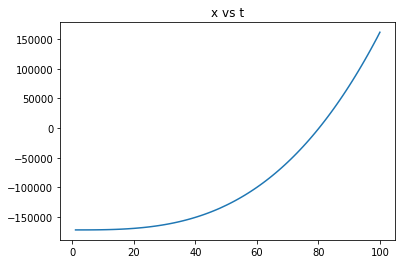

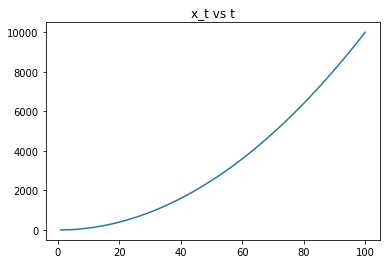

In [9]:
# input to neural network
t = tf.placeholder(shape=[None, 1], dtype=tf.float32)

epochs = 100000
# initial learning rate
lr = 0.01
l_rate = tf.placeholder(tf.float32)


# network architecture
ly1 = tf.layers.dense(inputs=t, units=640, activation=tf.nn.sigmoid,
                                  kernel_initializer=tf.random_normal_initializer(0., .1),
                                  bias_initializer=tf.constant_initializer(0.))
ly2 = tf.layers.dense(inputs=ly1, units=320, activation=tf.nn.relu,
                                  kernel_initializer=tf.random_normal_initializer(0., .1),
                                  bias_initializer=tf.constant_initializer(0.))
ly3 = tf.layers.dense(inputs=ly2, units=16, activation=tf.nn.relu,
                                  kernel_initializer=tf.random_normal_initializer(0., .1),
                                  bias_initializer=tf.constant_initializer(0.))
ly4 = tf.layers.dense(inputs=ly3, units=8, activation=tf.nn.relu,
                                  kernel_initializer=tf.random_normal_initializer(0., .1),
                                  bias_initializer=tf.constant_initializer(0.))
op = tf.layers.dense(inputs=ly1, units=1, activation=None)

# input range is [1,inp_length]
inp_length = 100

# computing gradient
x_t = tf.gradients(op,t)[0]

# loss function
# equation: dx/dt = t^2 -3
loss = tf.reduce_mean(tf.square(x_t - t*t + 3))

# equation: dx/dt = 6x^2*t
# loss = tf.reduce_mean(tf.square(x_t - 6*op[0]*op[0]*t))

# optimizer
opt = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)
# opt = tf.train.GradientDescentOptimizer(learning_rate = lr).minimize(loss)

# training data
time_var = np.array([i for i in range(1,inp_length+1)])
time_var = time_var[:, np.newaxis]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    losses = []
    for i in range(epochs):
        count = 0
        # adaptive learning rate to avoid skipping minima
        if((i+1)%20000 == 0):
            lr = 0.1*lr
            print("learning rate:", lr)
        
        inp = np.reshape(time_var, [-1,1])
        x,_ = sess.run([op,opt], feed_dict={t: inp, l_rate: lr})
        losses.append(loss.eval({t: time_var, l_rate: lr}))
            
        if(i+1 == epochs):
            print("Input : ",inp,"output : ",x,"loss : ",loss.eval({t: time_var, l_rate: lr}))
            print("Derivative: ",x_t.eval({t:inp, l_rate: lr}))
            count = count + 1
        if(i % 500 == 0):
            print("Epoch :", i)
            print("loss : ",loss.eval({t: time_var}))
            
        #     print("x : ", x,"loss : ",loss.eval({t: time_var, l_rate: lr}))
        #     print("x_t: ",x_t.eval({t:inp, l_rate: lr}))

    time_test = np.array([i for i in range(1,inp_length+1)])
    time_test = time_test[:, np.newaxis]
    print(op.eval({t: time_test}))
    pred = list(op.eval({t: time_test}))
    pred = [i[0] for i in pred]
    derivatives = list(x_t.eval({t: time_test}))
    derivatives = [i[0] for i in derivatives]
    inp = [i for i in range(1,inp_length+1)]
    plot_predicted_fn(inp, pred, derivatives)
    



In [ ]:
# pytorch and keras implementations are not complete

In [0]:
# using pytorch

import torch
import torch.nn as nn
import numpy as np
# import torchvision
# import torchvision.transforms as transforms

In [2]:



# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 1
hidden_size = 64
# num_classes = 10
num_epochs = 50000
batch_size = 10
learning_rate = 0.001

# # MNIST dataset 
# train_dataset = torchvision.datasets.MNIST(root='../../data', 
#                                            train=True, 
#                                            transform=transforms.ToTensor(),  
#                                            download=True)

# test_dataset = torchvision.datasets.MNIST(root='../../data', 
#                                           train=False, 
#                                           transform=transforms.ToTensor())

# # Data loader
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
#                                            batch_size=batch_size, 
#                                            shuffle=True)

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
#                                           batch_size=batch_size, 
#                                           shuffle=False)

#Train data

train_data = np.array([[float(i)] for i in range(1,101)])
# train_data = train_data[:, np.newaxis]
train_data = torch.from_numpy(train_data)

train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True)


# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, hidden_size*2)
        self.fc3 = nn.Linear(hidden_size*2, 1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        # out = self.tanh(out)
        out = self.fc3(out)
        return out

model = NeuralNet(input_size, hidden_size).to(device)

# def my_loss(output, inp):
#     # loss = torch.mean((output - target)**2)
#     losses = []
#     for i in inp:
#       x = torch.autograd.Variable(i,requires_grad=True)
#       print(x)
#       y = model(x.float())
#       # print("in loss fn: ",y)
#       y.backward()
#       losses.append((x.grad - x**2 + 3) ** 2)
    
#     losses = torch.FloatTensor(losses)
#     print(losses)
#     loss = torch.mean(losses)
#     return loss


def my_loss(output, inp):
    x = torch.autograd.Variable(inp,requires_grad=True)
    y = model(x.float())
    y.backward()
    loss = (x.grad - x**2 + 3) ** 2
    # print(x.grad)
    return loss
    




# Loss and optimizer
# criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
# total_step = len(train_loader)
total_step = 100
for epoch in range(num_epochs):
    print("Epoch :", epoch)
    # for i, inp in enumerate(train_loader):  
    for inp in train_data:    
        # Forward pass
        # i = i.reshape(-1,1).to(device)
        # print(inp, type(inp))
        outputs = model(inp.float())
        # print(outputs)
        # loss = criterion(outputs, inp.float())
        
        loss = my_loss(outputs, inp)
        
        # print(loss.item())
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # if (i+1) % 100 == 0:
        #     print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        #            .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    print(loss)

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for images, labels in test_loader:
#         images = images.reshape(-1, 28*28).to(device)
#         labels = labels.to(device)
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# # Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')


Epoch : 0
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 1
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 2
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 3
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 4
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 5
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 6
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 7
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 8
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 9
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 10
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 11
tensor([99940025.5180], dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch : 12
tensor([99940025.5180], dtype=torch.flo

KeyboardInterrupt: ignored

In [0]:
# Keras implementation

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K



Using TensorFlow backend.


In [0]:
def custom_loss(actual,pred):
    loss = K.mean(K.sum(K.square((actual - pred )/10)))
    grads = K.gradients(model.output, model.input)[0]
    # loss = (grads - model.input**2 + 3) **2
    inp = K.variable(model.input)
    print(grads - inp**2 + 3 )
    return loss

In [0]:
train_data = np.array([[float(i)] for i in range(1,101)])
# train_data = train_data[:, np.newaxis]

model = Sequential()
model.add(Dense(64, input_dim=1, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='linear'))
# compile the keras model
model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
X = train_data
hist = model.fit(X, X, epochs=10, batch_size=10)



ValueError: ignored